We will conduct a sentiment analysis on the hashtag "#RIPtwitter"

1)In order to be able to do this we will need the following libraries:
Re →  for cleaning the tweets
NLTK →  for removing stop words
Numpy →  for processing image
Pandas →  for handling extracted data
Textblob →  for sentiment analysis
Wordcloud →  for plotting word cloud
Tweepy →  for Twitter API authorization and extracting tweets from it
Matplotlib →  for visualization.

In [181]:
!pip install re 
!pip install  nltk
!pip install  tweepy
!pip install  numpy 
!pip install  pandas 
!pip install  textblob 
!pip install  matplotlib
!pip install  wordcloud 

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


2)Import the previous installed libraries

In [182]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

3)Making use of Twitter API

In [183]:
TWITTER_API_KEY = "8r4bvIuCRsNzrbdPsCqaUoVv9"
TWITTER_API_SECRET = "JptZjnN991736aSssz4F8RUaOPtTHEOejNyDGb064KAjPJ2GMU"
TWITTER_ACCESS_TOKEN = "1297797286148399104-JTeBfDEIMD5xDmuzgtmiOcJMrurhFx"
TWITTER_ACCESS_SECRET = "FmJFEJjFiJEMMRAHenXe1dCNpPD6lz02mKuZVMzBP9b7c"

#Authentificate with Twitter
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)
 
#Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

4)Get Elon Musk's tweets, before and after he became the CEO of Twitter. 

4.1) Before Elon Musk

In [184]:
before_query = 'elonmusk -start-time:2021-01-01 -end-time:2022-10-26'  

resultsBeforeElon = tweepy.Cursor(api.search_tweets, q=before_query, lang='en', tweet_mode='extended').items(2000)

# creating json files containing the mined tweets
with open("data_before_Elon_Musk.json", "w") as f_before:
    json.dump([tweet.full_text for tweet in resultsBeforeElon], f_before)


Rate limit reached. Sleeping for: 725


In [185]:
# See how many tweets we actually mined
f_before = open("data_before_Elon_Musk.json")
data_before = json.load(f_before)
f_before.close()
len(data_before)

2000

In [186]:
# add the tweets in a dataframe
df_before = pd.DataFrame(data_before, columns=['Tweets'])  

In [187]:
# see a sample of the optained tweets before Elon Musk
df_before.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_8556/1079387593.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1073,@carsonight @william67670367 @kesserven @EPavlic @elonmusk @Tesla @mayemusk @TeslaOwnersEBay @teslaownersSV @28delayslater @TeslaNY @klwtts @Teslarati @Kristennetten And Germany just tore down a wind farm to open up a coal mine. Maybe they didn’t get the “it’s all fine” memo.
1208,"RT @richimedhurst: @elonmusk Check out the full playlist, summarizing each day of the court proceedings:\n https://t.co/wntLDSDUgb\n\nI also i…"
46,"RT @AlienSquidCoin: Ready??? Mission ""Moon"" starts soon!!! 🛸🛸🛸🌕🌕🌕👽👾\n\n#BNB #BSC #BSCGemsAlert #Binance #BTC #Bitcoin #ETH #Ethereum #Elonmus…"
1176,RT @CollinRugg: All I want for Christmas is for @elonmusk to bankrupt the main stream media.
1864,@pinemikey @MattWallace888 @elonmusk That's not what he said. Learn to read


4.2) After Elon Musk

In [188]:
after_query = 'elonmusk -start-time:2022-10-27' 

resultsAfterElon = tweepy.Cursor(api.search_tweets, q=after_query, lang='en', tweet_mode='extended').items(2000)

# creating json files containing the mined tweets
with open("data_after_Elon_Musk.json", "w") as f_after:
    json.dump([tweet.full_text for tweet in resultsAfterElon], f_after)

Rate limit reached. Sleeping for: 826


In [189]:
# See how many tweets we actually mined
f_after = open("data_after_Elon_Musk.json")
data_after = json.load(f_after)
f_after.close()
len(data_after)

2000

In [190]:
# add the tweets in a dataframe
df_after = pd.DataFrame(data_after, columns=['Tweets'])  

In [191]:
# see a sample of the optained tweets after Elon Musk
df_after.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_8556/2848080920.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1457,RT @SteveHiltonx: We heard about “Russia collusion” on every TV station for years. \n\nNow @elonmusk has exposed blatant Democrat campaign co…
1376,"@ConcernedMaiden @CT_KDO @CollinRugg @elonmusk I really love opensecrets and a couple other sites aimed to provide transparency between the relationships of the party and its leaders and corporations, just laying out the data and saving me the opinion."
1898,"RT @amuse: UPDATE: Dr. Fauci's daughter, Ali Fauci, no longer works for @elonmusk's Twitter. She left the company and works at the Soros-ba…"
216,@elonmusk @RubinReport Thank u I don’t mind ads but when it’s every other post it makes for an annoying scroll.
943,@GmorganJr I’m afraid of @elonmusk and other MAD SCIENTISTS “summoning the demon” Gerald. 🤔\n\nWe have better free speech on truth social. You still haven’t signed up for it by the way. Who’s afraid of free speech bro? Also can you really support this? 🤔👇🏾👇🏾👇🏾\n\nhttps://t.co/d1JegCTwwA


5)Cleaning the tweets. We will remove from the tweets using regex + re library any URL links, mentions or any elements in a tweet that are irrelevant ot the sentiment analysis.

In [192]:
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) # remove tag(@)
  tweets = re.sub('#[A-Za-z0–9]+', '', tweets) # remove hashtags(#)
  tweets = re.sub('RT[\s]+', '', tweets) # remove RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # remove URL links
  tweets = re.sub('\[(.*?)\]', '', tweets) #remove fonts and writing styles, e.g. [$lt...$gt]
  return tweets

Applying the previously implemented regex to our tweets lists: before and after Elon Musk

In [193]:
df_before.Tweets = df_before.Tweets.apply(clean_tweets)
df_after.Tweets = df_after.Tweets.apply(clean_tweets)

# see a sample of the resulted cleaned tweets
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_8556/3330001544.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1799,: We heard about “Russia collusion” on every TV station for years. \n\nNow has exposed blatant Democrat campaign co…
904,: It’s not a coincidence that Biden launched a federal investigation into just days after Elon exposed the trut…
1603,: We heard about “Russia collusion” on every TV station for years. \n\nNow has exposed blatant Democrat campaign co…
1849,1 2 No. Trump won. By a lot.
279,All she pushes is distractions. Projection is a tool of the weak and guilty.


In [194]:
# export the cleaned tweets to csv files
df_before.to_csv("clean_data_before_Elon_Musk.csv")
df_after.to_csv("clean_data_after_Elon_Musk.csv")

6) Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [195]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(5)

,Tweets,Subjectivity,Polarity
0,: It’s not a coincidence that Biden launched a federal investigation into just days after Elon exposed the trut…,0.00,0.000
1,": He can try all he wants, in the meantime I will block them all. No more engagement with MAGA-…",0.30,-0.025
2,: “I was concerned because I saw Biden talking about wanting a national security review of ! One has to wonder if…,0.00,0.000
3,"This is her totally, keep vigilant 🙏🏻",0.75,0.000
4,The corruption is so obvious at this point - it would be laughable if it weren’t so terrifying. Where are all the people who spent ‘16-‘20 screeching about an authoritarian regime?,0.65,-0.400


In [196]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(5)

,Tweets,Subjectivity,Polarity
0,"182 376 You don't have to be 'sticking up' for someone to understand and apply logic. Turn your comment around, you've got to be against the evil billionaire? loser..",1.000000,-1.000000
1,Of course you can.,0.000000,0.000000
2,@240gordymacd 1 Yeah yeah. I’m sure you believe that everyone that voted for Trump are cultists too huh?,0.888889,0.500000
3,_levy: NEW from me: 's is under federal investigation for potential violations of animal welfare laws amid…,0.727273,0.068182
4,more gaslighting...,0.500000,0.500000


7) Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

7.1) Before Elon Musk

In [197]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,: It’s not a coincidence that Biden launched a federal investigation into just days after Elon exposed the trut…,0.00,0.000,Netural
1,": He can try all he wants, in the meantime I will block them all. No more engagement with MAGA-…",0.30,-0.025,Negative
2,: “I was concerned because I saw Biden talking about wanting a national security review of ! One has to wonder if…,0.00,0.000,Netural
3,"This is her totally, keep vigilant 🙏🏻",0.75,0.000,Netural
4,The corruption is so obvious at this point - it would be laughable if it weren’t so terrifying. Where are all the people who spent ‘16-‘20 screeching about an authoritarian regime?,0.65,-0.400,Negative


7.2) After Elon Musk

In [198]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,"182 376 You don't have to be 'sticking up' for someone to understand and apply logic. Turn your comment around, you've got to be against the evil billionaire? loser..",1.000000,-1.000000,Negative
1,Of course you can.,0.000000,0.000000,Netural
2,@240gordymacd 1 Yeah yeah. I’m sure you believe that everyone that voted for Trump are cultists too huh?,0.888889,0.500000,Positive
3,_levy: NEW from me: 's is under federal investigation for potential violations of animal welfare laws amid…,0.727273,0.068182,Positive
4,more gaslighting...,0.500000,0.500000,Positive


7.3) The ratio of the sentiment in both situations (Before and After Elon Musk)

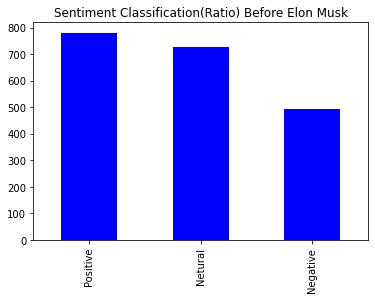

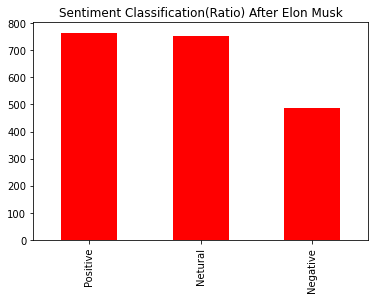

In [199]:
#The ratio of the sentiment before Elon Musk
df_before.Sentiment.value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classification(Ratio) Before Elon Musk')
plt.show()
#The ratio of the sentiment after Elon Musk
df_after.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification(Ratio) After Elon Musk')
plt.show()

Text(0, 0.5, 'Subjectivity')

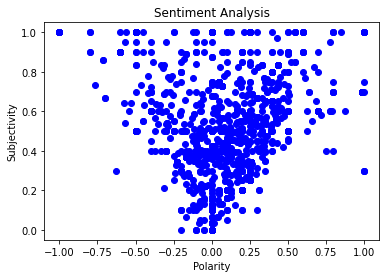

In [200]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
plt.scatter(df_before.Polarity, df_before.Subjectivity, color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

Text(0, 0.5, 'Subjectivity')

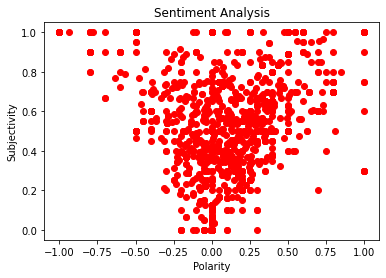

In [201]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
plt.scatter(df_after.Polarity, df_after.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

Text(0, 0.5, 'Subjectivity')

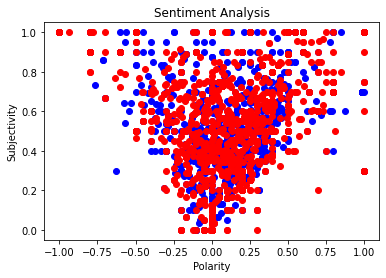

In [202]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
plt.scatter(df_before.Polarity, df_before.Subjectivity, color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.scatter(df_after.Polarity, df_after.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [203]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before


,Sentiment,Total Before Elon Musk
Positive,39.00,780
Netural,36.25,725
Negative,24.75,495


In [204]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after

,Sentiment,Total After Elon Musk
Positive,38.20,764
Netural,37.55,751
Negative,24.25,485


7)The mosst used word in the tweets that have #RIPtwitter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


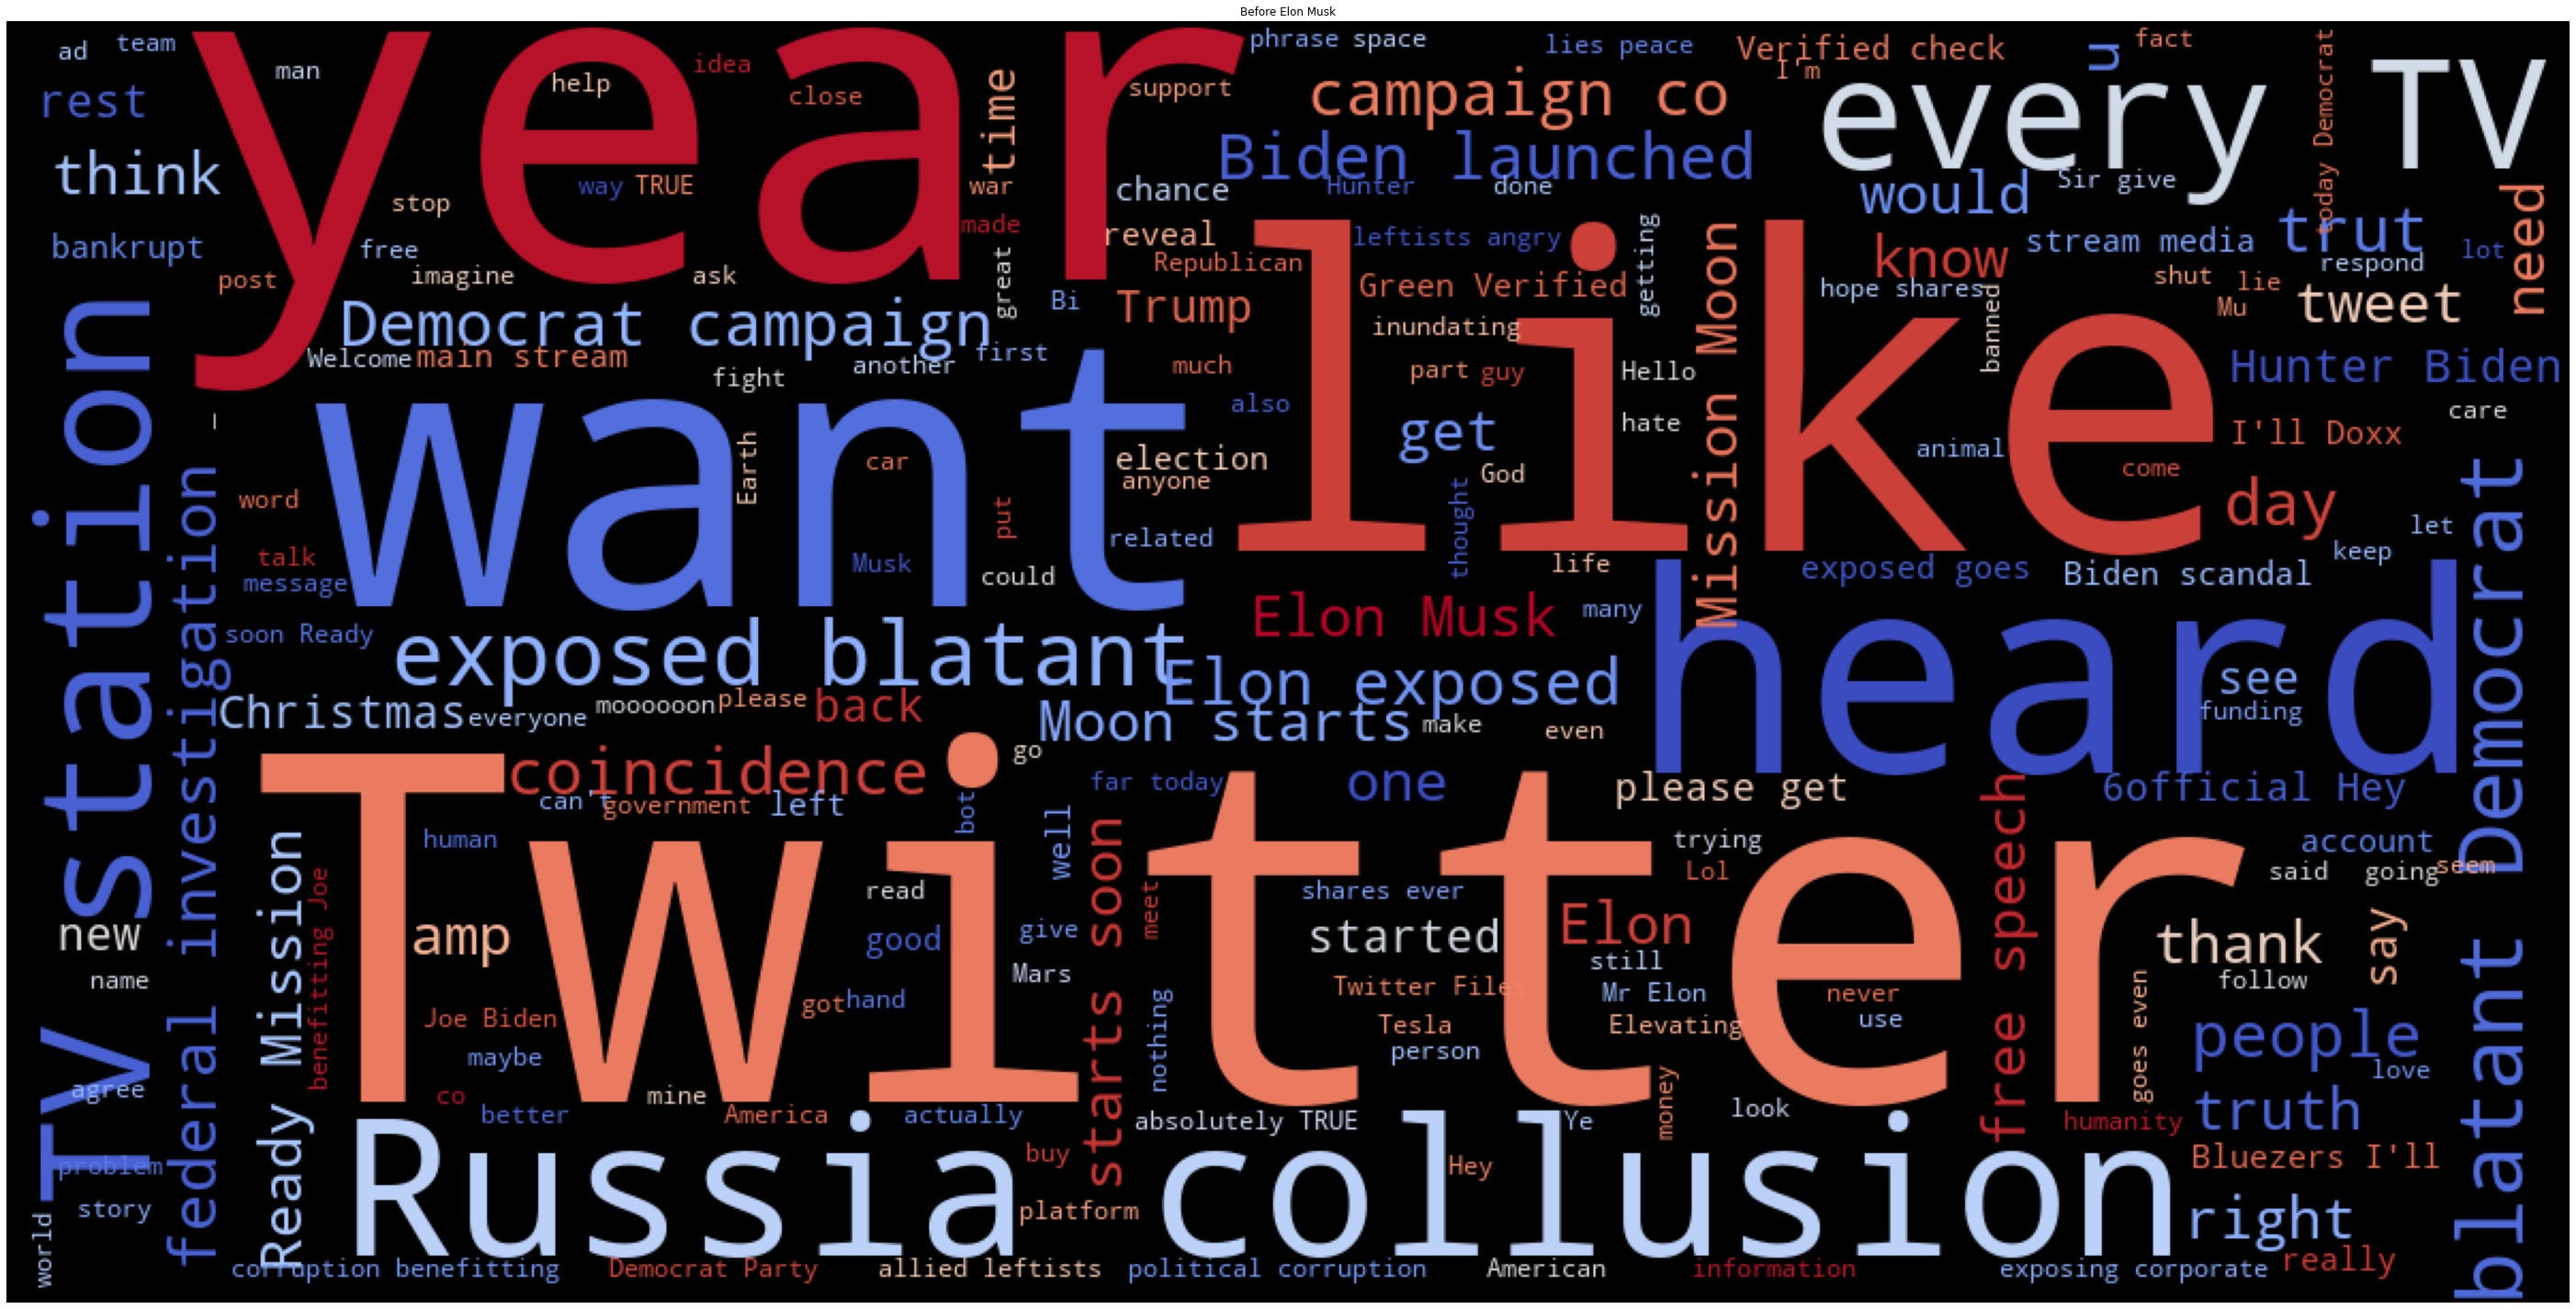

In [205]:
# Stop Words 
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining tweets by their text
allWords = ' '.join([twts for twts in df_before['Tweets']])
def Word_cloud_image(data, title, mask=None):
    WordCloudImage = WordCloud(scale=3,random_state=21,colormap='coolwarm_r',mask=mask,stopwords=stpwrd,collocations=True,).generate(data)
    plt.figure(figsize=(50,70))
    plt.imshow(WordCloudImage)
    plt.axis('off')
    plt.title(title)
    plt.show()

Word_cloud_image(allWords, 'Before Elon Musk')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


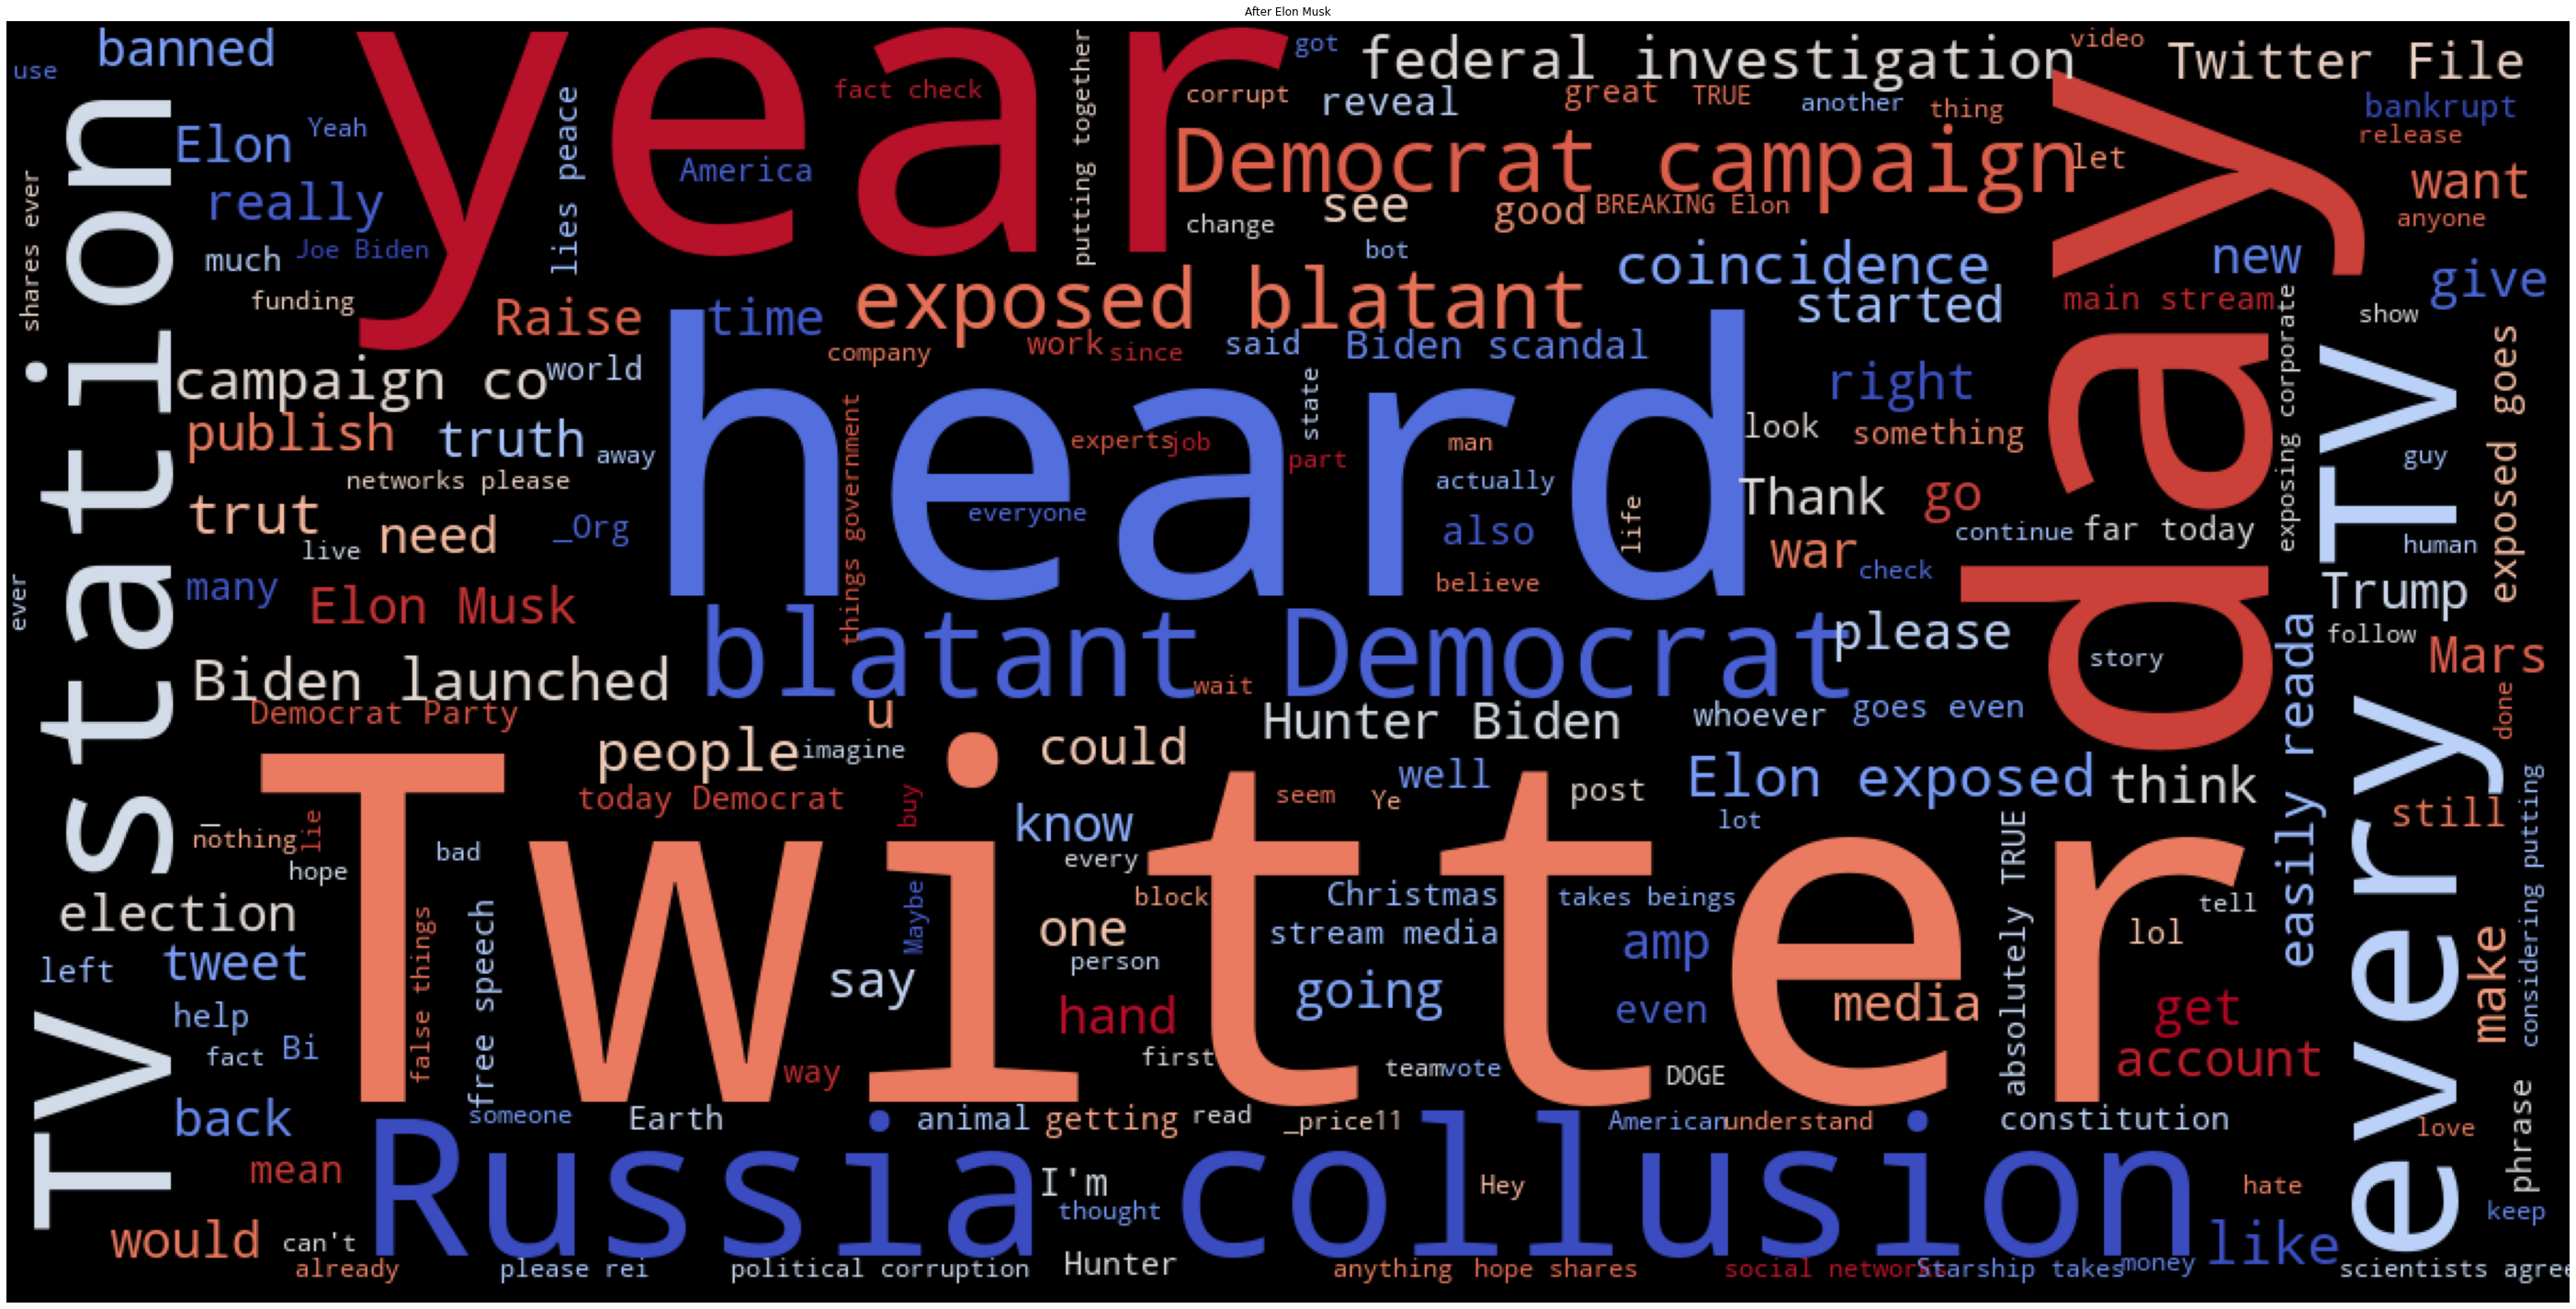

In [206]:
# Stop Words 
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining tweets by their text
allWords = ' '.join([twts for twts in df_after['Tweets']])
def Word_cloud_image(data, title, mask=None):
    WordCloudImage = WordCloud(scale=3,random_state=21,colormap='coolwarm_r',mask=mask,stopwords=stpwrd,collocations=True,).generate(data)
    plt.figure(figsize=(50,70))
    plt.imshow(WordCloudImage)
    plt.axis('off')
    plt.title(title)
    plt.show()
 
Word_cloud_image(allWords, 'After Elon Musk')